In [1]:
import pandas as pd
import numpy as np

## Obtaining Data

Downloaded a csv containing all pincodes and their corresponding post offices. We can assume each post office represents a neighborhood

In [2]:
df = pd.read_csv("storage/neighbourhoods.csv")

In [3]:
df.head()

,officename,pincode,officeType,Deliverystatus,divisionname,regionname,circlename,Taluk,Districtname,statename,Telephone,Related Suboffice,Related Headoffice,longitude,latitude
0,Achalapur B.O,504273,B.O,Delivery,Adilabad,Hyderabad,Andhra Pradesh,Asifabad,Adilabad,TELANGANA,NaN,Rechini S.O,Mancherial H.O,NaN,NaN
1,Ada B.O,504293,B.O,Delivery,Adilabad,Hyderabad,Andhra Pradesh,Asifabad,Adilabad,TELANGANA,NaN,Asifabad S.O,Mancherial H.O,NaN,NaN
2,Adegaon B.O,504307,B.O,Delivery,Adilabad,Hyderabad,Andhra Pradesh,Boath,Adilabad,TELANGANA,NaN,Echoda S.O,Adilabad H.O,NaN,NaN
3,Adilabad Collectorate S.O,504001,S.O,Non-Delivery,Adilabad,Hyderabad,Andhra Pradesh,Adilabad,Adilabad,TELANGANA,08732-226703,NaN,Adilabad H.O,NaN,NaN
4,Adilabad H.O,504001,H.O,Delivery,Adilabad,Hyderabad,Andhra Pradesh,Adilabad,Adilabad,TELANGANA,08732-226738,NaN,NaN,NaN,NaN


In [4]:
df.shape

(154797, 15)

We are restricting our analysis only to Bangalore. 

In [5]:
df = df[["officename","regionname"]]

In [6]:
df = df[df["regionname"] == "Bangalore HQ"]

In [7]:
df.reset_index(inplace = True, drop = True)
df.head()

,officename,regionname
0,A F Station Yelahanka S.O,Bangalore HQ
1,Agram S.O,Bangalore HQ
2,Air Force Hospital S.O,Bangalore HQ
3,Amruthahalli B.O,Bangalore HQ
4,Anandnagar S.O (Bangalore),Bangalore HQ


In [8]:
!pip install geopy

     |████████████████████████████████| 102kB 16.3MB/s ta 0:00:01


### Geocoding each neighborhood using Nominatim

In [9]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut


In [10]:
geolocator = Nominatim(user_agent="bangalore")
geolocator.geocode("Banaswadi S.O")

Location(Banaswadi, East Zone, Bengaluru, Bangalore Urban, Karnataka, 560043, India, (13.0141618, 77.6518539, 0.0))

In [11]:
rows = []
def do_geocode(address):
    try:
        return geolocator.geocode(address)
    except GeocoderTimedOut:
        return do_geocode(address)
for neighbourhood in df["officename"]:
    address = do_geocode(neighbourhood)
    if address != None:
        rows.append([neighbourhood, address.latitude,address.longitude])
        print(neighbourhood)
df_geocoded = pd.DataFrame(rows,columns = ["Neigbourhood", "Latitude", "Longtitude"])

        

Agram S.O
Amruthahalli B.O
Attur B.O
Banaswadi S.O
Bellandur S.O
Bhattarahalli S.O
Bidrahalli B.O
Byatarayanapura B.O
Devanagundi B.O
Devasandra S.O
Doddagubbi B.O
Doddanekkundi B.O
Domlur S.O
EPIP S.O
Fraser Town S.O
Gunjur B.O
HighCourt S.O
Hoodi B.O
Horamavu B.O
Indiranagar S.O (Bangalore)
Jakkur B.O
Kadugodi S.O
Kalkunte B.O
Kannamangala B.O
Kodigehalli B.O
Kothanur S.O
Krishnarajapuram S.O
Kundalahalli S.O
Lingarajapuram S.O
Mahadevapura S.O
Medimallasandra B.O
Mundur B.O
Museum Road S.O
NAL S.O
Panathur B.O
Rajanakunte B.O
Sadashivanagar S.O
Samethanahalli B.O
Singanayakanahalli B.O
Vasanthanagar S.O
Venkateshapura S.O
Vimanapura S.O
Virgonagar S.O
Whitefield S.O
Yelahanka S.O
Adugodi S.O
Agara B.O
Anjanapura S.O
Banashankari S.O
Bannerghatta S.O
Basavanagudi H.O
Begur B.O
Bolare B.O
Bommanahalli S.O (Bangalore)
Chandapura B.O
Chandapura S.O
Chickpet S.O
Chikkalasandra S.O
Deepanjalinagar S.O
Doddakallasandra S.O
Girinagar S.O (Bangalore)
Gottigere S.O
Haragadde B.O
Hennagara B.O

In [17]:
df = df_geocoded

In [20]:
df.rename(columns={"Longtitude":"Longitude","Neigbourhood":"Neighborhood"}, inplace=True)


In [21]:
df.head()

,Neighborhood,Latitude,Longitude
0,Agram S.O,45.813177,15.977048
1,Amruthahalli B.O,13.066513,77.596624
2,Attur B.O,11.663711,78.533551
3,Banaswadi S.O,13.014162,77.651854
4,Bellandur S.O,58.235358,26.683117


In [22]:
nl = []
for neighborhood in df['Neighborhood']:
    if 'S.O' in neighborhood:
        nw = neighborhood.rstrip(' S.O')
    elif 'B.O' in neighborhood:
        nw = neighborhood.rstrip(' B.O')
    else:
        nw = neighborhood
    nl.append(nw)
df['Neighborhood'] = nl

In [48]:
df.head()

,Neighborhood,Latitude,Longitude
0,Agram,45.813177,15.977048
1,Amruthahalli,13.066513,77.596624
2,Attur,11.663711,78.533551
3,Banaswadi,13.014162,77.651854
4,Bellandur,58.235358,26.683116


In [ ]:
df.to_csv("storage/blr_neighborhoods.csv")

### Mapping these neighborhoods onto a map

In [23]:
!pip install folium

     |████████████████████████████████| 92kB 14.5MB/s eta 0:00:01


In [24]:
import folium

map_blr = folium.Map(location = [12.9716, 77.5946], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [lat, lng],
        radius = 5,
        popup = label,
        parse_html = False).add_to(map_blr)  
    
map_blr

### Getting 10 most popular attractions of each location
We are using the FourSquare Places API

In [25]:
CLIENT_ID = '21J4IKB1BSFGKOCUMAJGV2NUTXJ3OADBGONUL5H3KVYP22X1' # your Foursquare ID
CLIENT_SECRET = 'FZR3GQNXWTXYHUQO1O4X1OLFYVAKNAVNHXEVZVKOTDIW0FV3' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100

In [26]:
import requests
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues)

In [27]:
df.head()

,Neighborhood,Latitude,Longitude
0,Agram,45.813177,15.977048
1,Amruthahalli,13.066513,77.596624
2,Attur,11.663711,78.533551
3,Banaswadi,13.014162,77.651854
4,Bellandur,58.235358,26.683117


In [28]:
blr_venues = getNearbyVenues(names = df['Neighborhood'],
                                   latitudes = df['Latitude'],
                                   longitudes = df['Longitude']
                                  )
                                  
blr_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Agram,45.813177,15.977048,Amélie,45.813842,15.979011,Dessert Shop
1,Agram,45.813177,15.977048,Trg bana Josipa Jelačića,45.813032,15.976868,Plaza
2,Agram,45.813177,15.977048,Tržnica Dolac,45.814070,15.977261,Farmers Market
3,Agram,45.813177,15.977048,Corner bar,45.812930,15.979440,Bar
4,Agram,45.813177,15.977048,Vinodol,45.811666,15.975643,Mediterranean Restaurant


In [29]:
blr_venues.shape

(770, 7)

In [38]:
count_df = blr_venues.groupby('Neighborhood').count()['Venue']
count_df.head()

Neighborhood
Adugodi           5
Agram           100
Akkur            28
Alahalli          1
Amruthahalli      3
Name: Venue, dtype: int64

In [39]:
print('There are {} uniques categories.'.format(len(blr_venues['Venue Category'].unique())))

There are 172 uniques categories.


### One-Hot encoding 
Necessary as the values are nominal

In [40]:
blr_onehot = pd.get_dummies(blr_venues[['Venue Category']], prefix = "", prefix_sep = "")

# add neighborhood column back to dataframe
blr_onehot['Neighborhood'] = blr_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [blr_onehot.columns[-1]] + list(blr_onehot.columns[:-1])
blr_onehot = blr_onehot[fixed_columns]

blr_onehot.head()

,Neighborhood,ATM,Accessories Store,Afghan Restaurant,American Restaurant,Andhra Restaurant,Arcade,Art Museum,Arts & Entertainment,Asian Restaurant,...,Theme Park Ride / Attraction,Toll Plaza,Train Station,Travel & Transport,Udupi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Women's Store,Yoga Studio
0,Agram,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Agram,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Agram,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Agram,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Agram,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
blr_grouped = blr_onehot.groupby('Neighborhood').mean().reset_index()
blr_grouped.head()

,Neighborhood,ATM,Accessories Store,Afghan Restaurant,American Restaurant,Andhra Restaurant,Arcade,Art Museum,Arts & Entertainment,Asian Restaurant,...,Theme Park Ride / Attraction,Toll Plaza,Train Station,Travel & Transport,Udupi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Women's Store,Yoga Studio
0,Adugodi,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
1,Agram,0.0,0.0,0.0,0.01,0.0,0.0,0.01,0.0,0.01,...,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.03,0.0,0.0
2,Akkur,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
3,Alahalli,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
4,Amruthahalli,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0


In [42]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending = False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [43]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        # append 'st', 'nd', 'rd' to the top 3 venues
        columns.append('{}{} Most Common Venue'.format(ind + 1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind + 1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns = columns)
neighborhoods_venues_sorted['Neighborhood'] = blr_grouped['Neighborhood']

for ind in np.arange(blr_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(blr_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adugodi,Ice Cream Shop,Bus Station,Playground,Café,Athletics & Sports,Yoga Studio,Donut Shop,Farmers Market,Farm,Electronics Store
1,Agram,Bar,Bistro,Plaza,Café,Mediterranean Restaurant,Dessert Shop,Historic Site,Wine Bar,Theater,Italian Restaurant
2,Akkur,Supermarket,Pet Store,Bakery,Pharmacy,Clothing Store,Chinese Restaurant,Department Store,Discount Store,Sandwich Place,Bar
3,Alahalli,Food & Drink Shop,Yoga Studio,Fish Market,Fast Food Restaurant,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Dry Cleaner
4,Amruthahalli,Convenience Store,Indian Restaurant,Shoe Store,Yoga Studio,Discount Store,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant


### Analysis

In [58]:
d = {}
for venue in neighborhoods_venues_sorted['1st Most Common Venue']:
    if venue in d:
        d[venue] += 1
    else:
        d[venue] = 1

first_attr_df = pd.DataFrame.from_dict(d, orient='index',columns=['Frequency'])
first_attr_df.reset_index(level=0, inplace=True)
first_attr_df.rename(columns={"index":"Attraction"}, inplace=True)
first_attr_df.head()

,Attraction,Frequency
0,Ice Cream Shop,2
1,Bar,1
2,Supermarket,1
3,Food & Drink Shop,1
4,Convenience Store,1


In [62]:
%matplotlib inline

In [71]:
!pip install seaborn

     |████████████████████████████████| 215kB 28.7MB/s eta 0:00:01


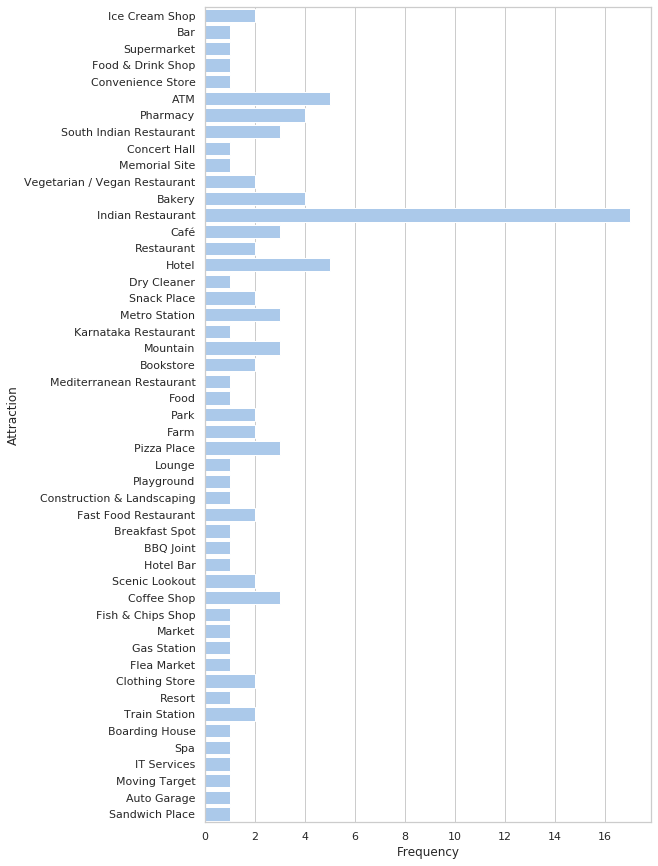

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(8,15)) 
# f, ax = plt.subplots(figsize=(6, 15))


# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Frequency", y="Attraction", data=first_attr_df,color="b")

This clearly shows the most popular attraction in most of the neighborhoods is Indian restaurant

### K Means clustering

In [82]:
from sklearn.cluster import KMeans


In [83]:
import matplotlib.pyplot as plt  
from matplotlib import style 
%matplotlib inline

In [84]:
blr_grouped_clustering = blr_grouped.drop('Neighborhood', 1)


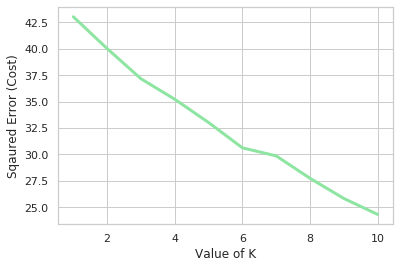

In [85]:
cost =[] 
for i in range(1, 11): 
    KM = KMeans(n_clusters = i, max_iter = 500) 
    KM.fit(blr_grouped_clustering) 
    
    cost.append(KM.inertia_)      
#  
plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() 

In [86]:
from sklearn.metrics import silhouette_score

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(blr_grouped_clustering)
    label = kmeans.labels_
    sil_coeff = silhouette_score(blr_grouped_clustering, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.03476480123959399
For n_clusters=3, The Silhouette Coefficient is 0.0788687742243432
For n_clusters=4, The Silhouette Coefficient is 0.0939703101236951
For n_clusters=5, The Silhouette Coefficient is 0.09176772687856345
For n_clusters=6, The Silhouette Coefficient is 0.14438917269535745
For n_clusters=7, The Silhouette Coefficient is 0.15002367628238217
For n_clusters=8, The Silhouette Coefficient is 0.18339196748077474
For n_clusters=9, The Silhouette Coefficient is 0.17273665582903575
For n_clusters=10, The Silhouette Coefficient is 0.16921046342357193


In [87]:
# set number of clusters
kclusters = 8
blr_grouped_clustering = blr_grouped.drop('Neighborhood', 1)
# run k-means clustering
kmeans = KMeans(n_clusters = kclusters, random_state = 0).fit(blr_grouped_clustering)
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [88]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [89]:
blr_merged = df
blr_merged = blr_merged.merge(neighborhoods_venues_sorted, on = 'Neighborhood')

blr_merged.head()

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agram,45.813177,15.977048,1,Bar,Bistro,Plaza,Café,Mediterranean Restaurant,Dessert Shop,Historic Site,Wine Bar,Theater,Italian Restaurant
1,Amruthahalli,13.066513,77.596624,1,Convenience Store,Indian Restaurant,Shoe Store,Yoga Studio,Discount Store,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant
2,Banaswadi,13.014162,77.651854,1,Vegetarian / Vegan Restaurant,Indian Restaurant,Juice Bar,BBQ Joint,Kerala Restaurant,Yoga Studio,Discount Store,Fast Food Restaurant,Farmers Market,Farm
3,Bellandur,58.235358,26.683117,6,Restaurant,Yoga Studio,Diner,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Dry Cleaner,Donut Shop
4,Bhattarahalli,13.025800,77.714279,1,Hotel,Ice Cream Shop,Udupi Restaurant,Café,Yoga Studio,Discount Store,Farmers Market,Farm,Electronics Store,Eastern European Restaurant


In [90]:
# create map
import matplotlib
map_clusters = folium.Map(location = [12.9716, 77.5946], zoom_start = 11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i * x) ** 2 for i in range(kclusters)]
colors_array = plt.cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [matplotlib.colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(blr_merged['Latitude'], blr_merged['Longitude'], blr_merged['Neighborhood'], blr_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius = 5,
        popup = label,
        color = rainbow[cluster - 1],
        fill = True,
        fill_color = rainbow[cluster - 1],
        fill_opacity = 0.7).add_to(map_clusters)
       
map_clusters

In [91]:
blr_merged.loc[blr_merged['Cluster Labels'] == 0, blr_merged.columns[[1] + list(range(5, blr_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,13.062074,Cosmetics Shop,Burger Joint,Yoga Studio,Donut Shop,Fast Food Restaurant,Farmers Market,Farm,Electronics Store,Eastern European Restaurant
10,12.991903,Yoga Studio,Discount Store,Fast Food Restaurant,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Dry Cleaner
24,13.147862,Café,Yoga Studio,Donut Shop,Fast Food Restaurant,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant
33,12.912192,Fast Food Restaurant,Pizza Place,Gym,Department Store,Bakery,Discount Store,Farmers Market,Farm,Electronics Store
37,12.856532,Department Store,Yoga Studio,Discount Store,Fast Food Restaurant,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant
53,12.869817,Yoga Studio,Discount Store,Fast Food Restaurant,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Dry Cleaner
67,15.415452,Indian Restaurant,Donut Shop,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant
77,12.798851,Breakfast Spot,Train Station,Yoga Studio,Donut Shop,Fast Food Restaurant,Farmers Market,Farm,Electronics Store,Eastern European Restaurant
81,13.248350,Yoga Studio,Discount Store,Fast Food Restaurant,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Dry Cleaner
87,13.144010,Lake,Coffee Shop,Yoga Studio,Fast Food Restaurant,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant


In [92]:
blr_merged.loc[blr_merged['Cluster Labels'] == 2, blr_merged.columns[[1] + list(range(5, blr_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,10.835443,Yoga Studio,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant
58,13.048426,Bakery,Fish Market,Fast Food Restaurant,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Dry Cleaner
79,13.135140,Yoga Studio,Discount Store,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Dry Cleaner,Donut Shop
104,13.018496,Fast Food Restaurant,Bakery,Café,Fish & Chips Shop,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant


In [93]:
blr_merged.loc[blr_merged['Cluster Labels'] == 3, blr_merged.columns[[1] + list(range(5, blr_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,12.952303,Yoga Studio,Discount Store,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Dry Cleaner,Donut Shop
102,12.963694,Yoga Studio,Discount Store,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Dry Cleaner,Donut Shop


In [94]:
blr_merged.loc[blr_merged['Cluster Labels'] == 4, blr_merged.columns[[1] + list(range(5, blr_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
83,13.176735,Yoga Studio,Discount Store,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Dry Cleaner,Donut Shop
99,24.467889,Yoga Studio,Discount Store,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Dry Cleaner,Donut Shop
101,13.178154,Yoga Studio,Discount Store,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Dry Cleaner,Donut Shop


### K Medoid clustering

In [97]:
from _k_medoids import KMedoids

The k medoids code is obtained from the sklearn_extra.cluster library

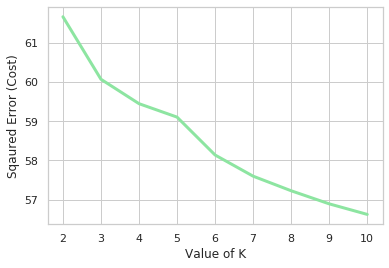

In [99]:
cost =[] 
for i in range(2, 11): 
    KM2 = KMedoids(n_clusters=i, random_state=0).fit(blr_grouped_clustering)
    
    cost.append(KM2.inertia_)      
#  
plt.plot(range(2, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() 

Using the elbow plot we can determine that there are 2 probable number of clusters, 2 and 6 

In [100]:
kmedoids = KMedoids(n_clusters=2, random_state=0).fit(blr_grouped_clustering)
kmd_labels = kmedoids.labels_
neighborhoods_venues_sorted4 = neighborhoods_venues_sorted
del neighborhoods_venues_sorted4['Cluster Labels']
neighborhoods_venues_sorted4.insert(0, 'Cluster Labels', kmd_labels)
blr_merged4 = df
blr_merged4 = blr_merged4.merge(neighborhoods_venues_sorted4, on = 'Neighborhood')
blr_merged4.head()



,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agram,45.813177,15.977048,1,Bar,Bistro,Plaza,Café,Mediterranean Restaurant,Dessert Shop,Historic Site,Wine Bar,Theater,Italian Restaurant
1,Amruthahalli,13.066513,77.596624,0,Convenience Store,Indian Restaurant,Shoe Store,Yoga Studio,Discount Store,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant
2,Banaswadi,13.014162,77.651854,0,Vegetarian / Vegan Restaurant,Indian Restaurant,Juice Bar,BBQ Joint,Kerala Restaurant,Yoga Studio,Discount Store,Fast Food Restaurant,Farmers Market,Farm
3,Bellandur,58.235358,26.683117,1,Restaurant,Yoga Studio,Diner,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Dry Cleaner,Donut Shop
4,Bhattarahalli,13.025800,77.714279,0,Hotel,Ice Cream Shop,Udupi Restaurant,Café,Yoga Studio,Discount Store,Farmers Market,Farm,Electronics Store,Eastern European Restaurant


In [101]:
kmedoids = KMedoids(n_clusters=6, random_state=0).fit(blr_grouped_clustering)
kmd_labels2 = kmedoids.labels_
neighborhoods_venues_sorted4 = neighborhoods_venues_sorted
del neighborhoods_venues_sorted4['Cluster Labels']
neighborhoods_venues_sorted4.insert(0, 'Cluster Labels', kmd_labels2)
blr_merged4 = df
blr_merged4 = blr_merged4.merge(neighborhoods_venues_sorted4, on = 'Neighborhood')
blr_merged4.head()



,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agram,45.813177,15.977048,3,Bar,Bistro,Plaza,Café,Mediterranean Restaurant,Dessert Shop,Historic Site,Wine Bar,Theater,Italian Restaurant
1,Amruthahalli,13.066513,77.596624,0,Convenience Store,Indian Restaurant,Shoe Store,Yoga Studio,Discount Store,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant
2,Banaswadi,13.014162,77.651854,0,Vegetarian / Vegan Restaurant,Indian Restaurant,Juice Bar,BBQ Joint,Kerala Restaurant,Yoga Studio,Discount Store,Fast Food Restaurant,Farmers Market,Farm
3,Bellandur,58.235358,26.683117,1,Restaurant,Yoga Studio,Diner,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Dry Cleaner,Donut Shop
4,Bhattarahalli,13.025800,77.714279,1,Hotel,Ice Cream Shop,Udupi Restaurant,Café,Yoga Studio,Discount Store,Farmers Market,Farm,Electronics Store,Eastern European Restaurant


In [102]:
print(kmd_labels2[0:10])

[1 3 2 3 0 3 3 0 2 3]


In [103]:
blr_merged4.loc[blr_merged4['Cluster Labels'] == 0, blr_merged4.columns[[1] + list(range(5, blr_merged4.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,13.066513,Indian Restaurant,Shoe Store,Yoga Studio,Discount Store,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant
2,13.014162,Indian Restaurant,Juice Bar,BBQ Joint,Kerala Restaurant,Yoga Studio,Discount Store,Fast Food Restaurant,Farmers Market,Farm
5,13.062074,Cosmetics Shop,Burger Joint,Yoga Studio,Donut Shop,Fast Food Restaurant,Farmers Market,Farm,Electronics Store,Eastern European Restaurant
10,12.991903,Yoga Studio,Discount Store,Fast Food Restaurant,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Dry Cleaner
11,13.027331,Chinese Restaurant,Athletics & Sports,Dry Cleaner,Yoga Studio,Discount Store,Fast Food Restaurant,Farmers Market,Farm,Electronics Store
24,13.147862,Café,Yoga Studio,Donut Shop,Fast Food Restaurant,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant
33,12.912192,Fast Food Restaurant,Pizza Place,Gym,Department Store,Bakery,Discount Store,Farmers Market,Farm,Electronics Store
37,12.856532,Department Store,Yoga Studio,Discount Store,Fast Food Restaurant,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant
39,12.929273,Café,Juice Bar,Chinese Restaurant,Fast Food Restaurant,Bakery,Sandwich Place,Restaurant,Snack Place,Brewery
47,12.952848,Restaurant,Beer Garden,Food Truck,Snack Place,Hotel,Other Nightlife,Cupcake Shop,Deli / Bodega,Farmers Market


In [104]:
blr_merged4.loc[blr_merged4['Cluster Labels'] == 1, blr_merged4.columns[[1] + list(range(5, blr_merged4.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,58.235358,Yoga Studio,Diner,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Dry Cleaner,Donut Shop
4,13.025800,Ice Cream Shop,Udupi Restaurant,Café,Yoga Studio,Discount Store,Farmers Market,Farm,Electronics Store,Eastern European Restaurant
12,12.973291,Pub,Café,Cocktail Bar,Ice Cream Shop,Italian Restaurant,Bakery,Indian Restaurant,Restaurant,Cupcake Shop
19,10.835443,Yoga Studio,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant
29,12.942847,Bus Station,Playground,Café,Athletics & Sports,Yoga Studio,Donut Shop,Farmers Market,Farm,Electronics Store
50,58.235358,Yoga Studio,Diner,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Dry Cleaner,Donut Shop
58,13.048426,Bakery,Fish Market,Fast Food Restaurant,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Dry Cleaner
104,13.018496,Fast Food Restaurant,Bakery,Café,Fish & Chips Shop,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant


In [105]:
blr_merged4.loc[blr_merged4['Cluster Labels'] == 2, blr_merged4.columns[[1] + list(range(5, blr_merged4.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,13.021626,Coffee Shop,Gym,Yoga Studio,Fast Food Restaurant,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant
16,12.968444,Hotel,Burger Joint,Dessert Shop,Bakery,Dry Cleaner,Farmers Market,Farm,Electronics Store,Eastern European Restaurant
27,44.373441,Pizza Place,Convenience Store,Gun Shop,Grocery Store,Donut Shop,Yoga Studio,Farm,Electronics Store,Eastern European Restaurant
32,12.968003,Food Truck,Miscellaneous Shop,Middle Eastern Restaurant,Cosmetics Shop,Cupcake Shop,Farmers Market,Construction & Landscaping,Farm,Electronics Store
40,12.930998,Breakfast Spot,Smoke Shop,Bus Station,Concert Hall,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant
48,12.945401,Accessories Store,Fast Food Restaurant,Train Station,Toll Plaza,Metro Station,Discount Store,Farmers Market,Farm,Electronics Store
55,13.056649,Pizza Place,Department Store,Clothing Store,Restaurant,Convenience Store,Discount Store,Farm,Electronics Store,Eastern European Restaurant
56,13.021626,Coffee Shop,Gym,Yoga Studio,Fast Food Restaurant,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant
59,13.046453,Bakery,Shopping Mall,Vegetarian / Vegan Restaurant,Indian Restaurant,Pool,Yoga Studio,Electronics Store,Eastern European Restaurant,Dumpling Restaurant
70,50.733978,Pet Store,Bakery,Pharmacy,Clothing Store,Chinese Restaurant,Department Store,Discount Store,Sandwich Place,Bar


In [106]:
blr_merged4.loc[blr_merged4['Cluster Labels'] == 4, blr_merged4.columns[[1] + list(range(5, blr_merged4.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,12.975720,Indian Restaurant,Motorcycle Shop,Movie Theater,Fried Chicken Joint,Multiplex,BBQ Joint,Office,Coffee Shop,Department Store
7,12.962467,Café,Chinese Restaurant,Pub,Rajasthani Restaurant,Liquor Store,BBQ Joint,Italian Restaurant,Pizza Place,Sports Bar
8,12.977673,Salad Place,Ice Cream Shop,Indian Restaurant,Maharashtrian Restaurant,Cafeteria,Breakfast Spot,Fast Food Restaurant,Farmers Market,Farm
15,13.000509,Indian Restaurant,Liquor Store,Movie Theater,Train Station,Fast Food Restaurant,Deli / Bodega,Dry Cleaner,Farmers Market,Farm
23,13.007708,Indian Restaurant,Café,Department Store,Gourmet Shop,Seafood Restaurant,Dessert Shop,Chinese Restaurant,Pizza Place,Plaza
25,12.962180,Farmers Market,Indian Restaurant,Bus Stop,Café,Yoga Studio,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant
26,13.033117,Breakfast Spot,Convenience Store,Cosmetics Shop,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm,Electronics Store,Eastern European Restaurant
35,12.885735,Afghan Restaurant,Indian Restaurant,Arts & Entertainment,Snack Place,Dry Cleaner,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
36,12.940144,Smoke Shop,Indian Restaurant,Soccer Field,Yoga Studio,Discount Store,Farmers Market,Farm,Electronics Store,Eastern European Restaurant
42,12.886018,Indian Restaurant,Dumpling Restaurant,Café,Donut Shop,Fast Food Restaurant,Farmers Market,Farm,Electronics Store,Eastern European Restaurant


In [107]:
blr_merged4.loc[blr_merged4['Cluster Labels'] == 5, blr_merged4.columns[[1] + list(range(5, blr_merged4.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,12.935146,Department Store,Supermarket,Yoga Studio,Donut Shop,Fast Food Restaurant,Farmers Market,Farm,Electronics Store,Eastern European Restaurant
22,13.169190,Train Station,Yoga Studio,Discount Store,Fast Food Restaurant,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant
28,13.100698,Train Station,Motorcycle Shop,Restaurant,Yoga Studio,Diner,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant
38,12.818896,Yoga Studio,Diner,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Dry Cleaner,Donut Shop
41,12.917657,Pizza Place,Train Station,Café,Yoga Studio,Diner,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant
84,13.798776,Train Station,Yoga Studio,Discount Store,Fast Food Restaurant,Farmers Market,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Dry Cleaner
86,12.732884,Pizza Place,Diner,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Dry Cleaner,Donut Shop
94,12.770644,Yoga Studio,Donut Shop,Fast Food Restaurant,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Dry Cleaner
100,12.860087,Yoga Studio,Donut Shop,Fast Food Restaurant,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Dry Cleaner
105,12.509896,Yoga Studio,Discount Store,Fast Food Restaurant,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Dry Cleaner


### DBSCAN Clustering

In [108]:
from sklearn.cluster import DBSCAN

dbsc = DBSCAN(eps = 0.5, min_samples = 3).fit(blr_grouped_clustering)
labels2 = dbsc.labels_
labels2[0:10]

array([ 0,  0,  0, -1, -1, -1, -1, -1,  0, -1])

In [112]:
neighborhoods_venues_sorted2 = neighborhoods_venues_sorted
#neighborhoods_venues_sorted2.insert(0, 'Cluster Labels', labels2)
blr_merged2 = df
blr_merged2 = blr_merged2.merge(neighborhoods_venues_sorted, on = 'Neighborhood')

blr_merged2


,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agram,45.813177,15.977048,3,Bar,Bistro,Plaza,Café,Mediterranean Restaurant,Dessert Shop,Historic Site,Wine Bar,Theater,Italian Restaurant
1,Amruthahalli,13.066513,77.596624,0,Convenience Store,Indian Restaurant,Shoe Store,Yoga Studio,Discount Store,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant
2,Banaswadi,13.014162,77.651854,0,Vegetarian / Vegan Restaurant,Indian Restaurant,Juice Bar,BBQ Joint,Kerala Restaurant,Yoga Studio,Discount Store,Fast Food Restaurant,Farmers Market,Farm
3,Bellandur,58.235358,26.683117,1,Restaurant,Yoga Studio,Diner,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Dry Cleaner,Donut Shop
4,Bhattarahalli,13.025800,77.714279,1,Hotel,Ice Cream Shop,Udupi Restaurant,Café,Yoga Studio,Discount Store,Farmers Market,Farm,Electronics Store,Eastern European Restaurant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,Shivagange,13.178154,77.228704,3,Mountain,Yoga Studio,Discount Store,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Dry Cleaner,Donut Shop
102,Tavarekere S.O (Bangalore),12.963694,77.401424,3,Scenic Lookout,Yoga Studio,Discount Store,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Dry Cleaner,Donut Shop
103,Thippasandra,12.973936,77.650998,4,Indian Restaurant,Tea Room,Bar,Smoke Shop,Flea Market,Vegetarian / Vegan Restaurant,Lounge,Arcade,Pub,Farm
104,Vidyanagara,13.018496,76.108893,1,Snack Place,Fast Food Restaurant,Bakery,Café,Fish & Chips Shop,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant


In [113]:
n_clusters_ = len(set(labels2)) - (1 if -1 in labels2 else 0)
print(n_clusters_)

2


In [114]:
blr_merged2.loc[blr_merged2['Cluster Labels'] == 0, blr_merged2.columns[[1] + list(range(5, blr_merged2.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,13.066513,Indian Restaurant,Shoe Store,Yoga Studio,Discount Store,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant
2,13.014162,Indian Restaurant,Juice Bar,BBQ Joint,Kerala Restaurant,Yoga Studio,Discount Store,Fast Food Restaurant,Farmers Market,Farm
5,13.062074,Cosmetics Shop,Burger Joint,Yoga Studio,Donut Shop,Fast Food Restaurant,Farmers Market,Farm,Electronics Store,Eastern European Restaurant
10,12.991903,Yoga Studio,Discount Store,Fast Food Restaurant,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Dry Cleaner
11,13.027331,Chinese Restaurant,Athletics & Sports,Dry Cleaner,Yoga Studio,Discount Store,Fast Food Restaurant,Farmers Market,Farm,Electronics Store
24,13.147862,Café,Yoga Studio,Donut Shop,Fast Food Restaurant,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant
33,12.912192,Fast Food Restaurant,Pizza Place,Gym,Department Store,Bakery,Discount Store,Farmers Market,Farm,Electronics Store
37,12.856532,Department Store,Yoga Studio,Discount Store,Fast Food Restaurant,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant
39,12.929273,Café,Juice Bar,Chinese Restaurant,Fast Food Restaurant,Bakery,Sandwich Place,Restaurant,Snack Place,Brewery
47,12.952848,Restaurant,Beer Garden,Food Truck,Snack Place,Hotel,Other Nightlife,Cupcake Shop,Deli / Bodega,Farmers Market


In [115]:
blr_merged2.loc[blr_merged2['Cluster Labels'] == 1, blr_merged2.columns[[1] + list(range(5, blr_merged2.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,58.235358,Yoga Studio,Diner,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Dry Cleaner,Donut Shop
4,13.025800,Ice Cream Shop,Udupi Restaurant,Café,Yoga Studio,Discount Store,Farmers Market,Farm,Electronics Store,Eastern European Restaurant
12,12.973291,Pub,Café,Cocktail Bar,Ice Cream Shop,Italian Restaurant,Bakery,Indian Restaurant,Restaurant,Cupcake Shop
19,10.835443,Yoga Studio,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant
29,12.942847,Bus Station,Playground,Café,Athletics & Sports,Yoga Studio,Donut Shop,Farmers Market,Farm,Electronics Store
50,58.235358,Yoga Studio,Diner,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Dry Cleaner,Donut Shop
58,13.048426,Bakery,Fish Market,Fast Food Restaurant,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Dry Cleaner
104,13.018496,Fast Food Restaurant,Bakery,Café,Fish & Chips Shop,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant


### Agglomerative Clustering

In [116]:
from sklearn.cluster import AgglomerativeClustering
neighborhoods_venues_sorted3 = neighborhoods_venues_sorted2
clustering = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=6).fit(blr_grouped_clustering)
labels3 = clustering.labels_
del neighborhoods_venues_sorted3['Cluster Labels']
neighborhoods_venues_sorted3.insert(0, 'Cluster Labels', labels3)
blr_merged3 = df
blr_merged3 = blr_merged3.merge(neighborhoods_venues_sorted3, on = 'Neighborhood')

blr_merged3

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agram,45.813177,15.977048,0,Bar,Bistro,Plaza,Café,Mediterranean Restaurant,Dessert Shop,Historic Site,Wine Bar,Theater,Italian Restaurant
1,Amruthahalli,13.066513,77.596624,1,Convenience Store,Indian Restaurant,Shoe Store,Yoga Studio,Discount Store,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant
2,Banaswadi,13.014162,77.651854,1,Vegetarian / Vegan Restaurant,Indian Restaurant,Juice Bar,BBQ Joint,Kerala Restaurant,Yoga Studio,Discount Store,Fast Food Restaurant,Farmers Market,Farm
3,Bellandur,58.235358,26.683117,5,Restaurant,Yoga Studio,Diner,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Dry Cleaner,Donut Shop
4,Bhattarahalli,13.025800,77.714279,0,Hotel,Ice Cream Shop,Udupi Restaurant,Café,Yoga Studio,Discount Store,Farmers Market,Farm,Electronics Store,Eastern European Restaurant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,Shivagange,13.178154,77.228704,2,Mountain,Yoga Studio,Discount Store,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Dry Cleaner,Donut Shop
102,Tavarekere S.O (Bangalore),12.963694,77.401424,4,Scenic Lookout,Yoga Studio,Discount Store,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Dry Cleaner,Donut Shop
103,Thippasandra,12.973936,77.650998,1,Indian Restaurant,Tea Room,Bar,Smoke Shop,Flea Market,Vegetarian / Vegan Restaurant,Lounge,Arcade,Pub,Farm
104,Vidyanagara,13.018496,76.108893,0,Snack Place,Fast Food Restaurant,Bakery,Café,Fish & Chips Shop,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant


In [117]:
print(labels3[0:10])

[0 0 0 0 1 3 0 1 0 0]


In [118]:
blr_merged3.loc[blr_merged3['Cluster Labels'] == 0, blr_merged3.columns[[1] + list(range(5, blr_merged3.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,45.813177,Bistro,Plaza,Café,Mediterranean Restaurant,Dessert Shop,Historic Site,Wine Bar,Theater,Italian Restaurant
4,13.025800,Ice Cream Shop,Udupi Restaurant,Café,Yoga Studio,Discount Store,Farmers Market,Farm,Electronics Store,Eastern European Restaurant
7,12.962467,Café,Chinese Restaurant,Pub,Rajasthani Restaurant,Liquor Store,BBQ Joint,Italian Restaurant,Pizza Place,Sports Bar
8,12.977673,Salad Place,Ice Cream Shop,Indian Restaurant,Maharashtrian Restaurant,Cafeteria,Breakfast Spot,Fast Food Restaurant,Farmers Market,Farm
9,42.245363,Market,Yoga Studio,Fish & Chips Shop,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Dry Cleaner
...,...,...,...,...,...,...,...,...,...,...
97,12.911766,Yoga Studio,Diner,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Dry Cleaner,Donut Shop
98,12.993658,Indian Restaurant,Coffee Shop,Electronics Store,Fast Food Restaurant,Donut Shop,Ice Cream Shop,Karnataka Restaurant,Food Court,Pizza Place
100,12.860087,Yoga Studio,Donut Shop,Fast Food Restaurant,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Dry Cleaner
104,13.018496,Fast Food Restaurant,Bakery,Café,Fish & Chips Shop,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant


In [119]:
blr_merged3.loc[blr_merged3['Cluster Labels'] == 1, blr_merged3.columns[[1] + list(range(5, blr_merged3.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,13.066513,Indian Restaurant,Shoe Store,Yoga Studio,Discount Store,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant
2,13.014162,Indian Restaurant,Juice Bar,BBQ Joint,Kerala Restaurant,Yoga Studio,Discount Store,Fast Food Restaurant,Farmers Market,Farm
5,13.062074,Cosmetics Shop,Burger Joint,Yoga Studio,Donut Shop,Fast Food Restaurant,Farmers Market,Farm,Electronics Store,Eastern European Restaurant
6,12.975720,Indian Restaurant,Motorcycle Shop,Movie Theater,Fried Chicken Joint,Multiplex,BBQ Joint,Office,Coffee Shop,Department Store
10,12.991903,Yoga Studio,Discount Store,Fast Food Restaurant,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Dry Cleaner
11,13.027331,Chinese Restaurant,Athletics & Sports,Dry Cleaner,Yoga Studio,Discount Store,Fast Food Restaurant,Farmers Market,Farm,Electronics Store
15,13.000509,Indian Restaurant,Liquor Store,Movie Theater,Train Station,Fast Food Restaurant,Deli / Bodega,Dry Cleaner,Farmers Market,Farm
23,13.007708,Indian Restaurant,Café,Department Store,Gourmet Shop,Seafood Restaurant,Dessert Shop,Chinese Restaurant,Pizza Place,Plaza
24,13.147862,Café,Yoga Studio,Donut Shop,Fast Food Restaurant,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant
25,12.962180,Farmers Market,Indian Restaurant,Bus Stop,Café,Yoga Studio,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant


In [120]:
blr_merged3.loc[blr_merged3['Cluster Labels'] == 2, blr_merged3.columns[[1] + list(range(5, blr_merged3.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
83,13.176735,Yoga Studio,Discount Store,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Dry Cleaner,Donut Shop
99,24.467889,Yoga Studio,Discount Store,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Dry Cleaner,Donut Shop
101,13.178154,Yoga Studio,Discount Store,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Dry Cleaner,Donut Shop


In [121]:
blr_merged3.loc[blr_merged3['Cluster Labels'] == 3, blr_merged3.columns[[1] + list(range(5, blr_merged3.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,13.078474,Discount Store,Fast Food Restaurant,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Dry Cleaner,Donut Shop
44,12.878617,Dhaba,Café,Donut Shop,Fast Food Restaurant,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant
73,12.708637,Camera Store,Fast Food Restaurant,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Dry Cleaner,Donut Shop
85,13.073014,Discount Store,Fast Food Restaurant,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Dry Cleaner,Donut Shop


In [122]:
blr_merged3.loc[blr_merged3['Cluster Labels'] == 4, blr_merged3.columns[[1] + list(range(5, blr_merged3.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,12.952303,Yoga Studio,Discount Store,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Dry Cleaner,Donut Shop
102,12.963694,Yoga Studio,Discount Store,Farmers Market,Farm,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Dry Cleaner,Donut Shop


## Cluster Evaluation Metrics

### Sillhouette Coefficient

In [123]:
sil_coeff0 = silhouette_score(blr_grouped_clustering, kmeans.labels_, metric='euclidean')
sil_coeff1 = silhouette_score(blr_grouped_clustering, labels2, metric='euclidean')
sil_coeff2 = silhouette_score(blr_grouped_clustering, labels3, metric='euclidean')
sil_coeff3 = silhouette_score(blr_grouped_clustering, kmd_labels, metric='euclidean')

print(sil_coeff0)
print(sil_coeff1)
print(sil_coeff2)
print(sil_coeff3)

0.19610746739247847
0.1391318150805085
0.137552821016789
0.07733267946208815


### Davies Bouldin Score

In [124]:
import sklearn

In [125]:
 
sklearn.metrics.davies_bouldin_score(blr_grouped_clustering, kmeans.labels_)

1.1792534290426284

In [126]:
sklearn.metrics.davies_bouldin_score(blr_grouped_clustering, labels2)

3.4678885613218626

In [127]:
sklearn.metrics.davies_bouldin_score(blr_grouped_clustering, labels3)

1.3956784752393547

In [128]:
 
sklearn.metrics.davies_bouldin_score(blr_grouped_clustering, kmd_labels)

3.916227564389721

K Medoid clustering has the highest Davies bouldin score while DBSCAN has the highest sillhouette score.

K medoid seems to be most suitable for our clustering as it has the highest Davies bouldin score and it splits the data into more number of clusters than DBSCAN.

### Results

We experimented with several different clustering algorithms. Using metrics it was determined that K-Medoid clustering gave the best results. 

In [129]:
# create map
import matplotlib
map_clusters = folium.Map(location = [12.9716, 77.5946], zoom_start = 11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i * x) ** 2 for i in range(kclusters)]
colors_array = plt.cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [matplotlib.colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(blr_merged4['Latitude'], blr_merged4['Longitude'], blr_merged4['Neighborhood'], blr_merged4['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius = 5,
        popup = label,
        color = rainbow[cluster - 1],
        fill = True,
        fill_color = rainbow[cluster - 1],
        fill_opacity = 0.7).add_to(map_clusters)
       
map_clusters

<center>Map showing various clustered neighborhoods</center>

### Discussion

We can further analyze the resulting clusters based on what our needs are. For aspiring entrepeneurs it can serve as a useful metric to predict the success of their venture based on what are the other popular attractions in the area. For people considering moving into a neighborhood they can check what other neighborhoods are similar to theirs. 

### Conclusion

Neighborhood Analysis can be a valuable step in making decisions for business and personal reasons. There are several different clustering algorithms. There is no 'one-size-fits-all' approach to clustering. Instead we must experiment with various clustering algorithms and use metrics to determine which algorithm yields the best results. Once we sluster neighborhoods we can try to identify patterns within the cluster or perform data analysis and visualization techniques to make better sense of the clusters. We can then use this information to guide our decision making process.